In [1]:
import tensorflow as tf

## Linear Regression
* Hypothesis : H(x)=Wx + b
* Cost(=Loss) function : (H(x) - y)**2
* Cost low -> Better Hypothesis

In [2]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight') #Variable = trainable variable
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train)) #tensor를 평균내주는 함수 : reduce_mean

In [3]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 23.21631 [-1.1205353] [-0.25543168]
20 0.25204656 [0.58391905] [0.4625256]
40 0.040022478 [0.75628096] [0.508009]
60 0.03463645 [0.78228503] [0.4905351]
80 0.031441867 [0.7939023] [0.46809122]
100 0.028555863 [0.80372] [0.44615078]
120 0.025934888 [0.81295705] [0.42518893]
140 0.023554472 [0.82174855] [0.4052071]
160 0.021392547 [0.83012587] [0.3861639]
180 0.019429063 [0.83810925] [0.36801568]
200 0.01764579 [0.8457175] [0.35072032]
220 0.016026186 [0.8529682] [0.33423772]
240 0.014555242 [0.85987824] [0.31852978]
260 0.013219307 [0.8664635] [0.3035601]
280 0.012005997 [0.8727392] [0.28929386]
300 0.010904026 [0.87872] [0.2756981]
320 0.0099032 [0.88441974] [0.26274127]
340 0.008994252 [0.88985157] [0.25039336]
360 0.008168721 [0.8950281] [0.23862581]
380 0.007418973 [0.89996135] [0.2274113]
400 0.006738028 [0.9046628] [0.21672383]
420 0.0061195754 [0.90914345] [0.20653856]
440 0.0055579077 [0.9134132] [0.19683203]
460 0.0050477753 [0.91748244] [0.18758167]
480 0.004584472 [0.921360

In [4]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a:3, b:4.5})) # a = 3, b = 4.5
print(sess.run(adder_node, feed_dict={a:[1,3],b:[2,4]}))

7.5
[3. 7.]


## Gradient descent algorithm
* simplified hypothesis : H(x) = Wx
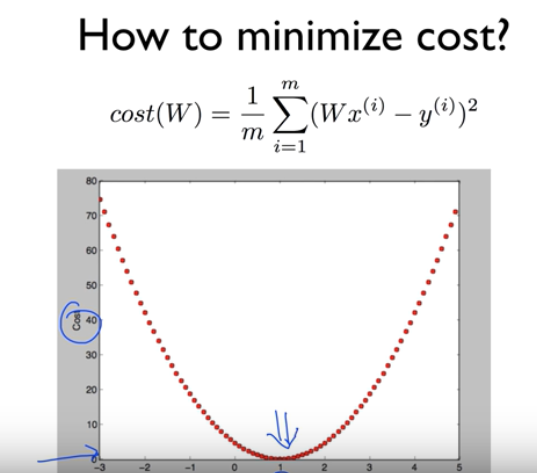

* Gradient descent algorithm -> minimize cost (미분을 이용)
* Convex function일 때만 잘 작동한다
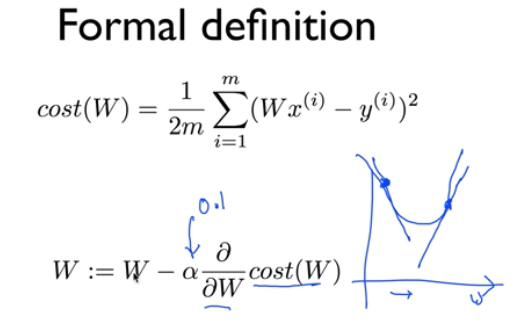

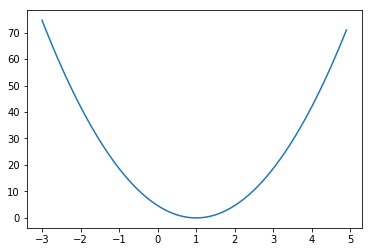

In [17]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer()) #변수초기화

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    cur_cost, cur_W = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(cur_W)
    cost_val.append(cur_cost)
    
    
plt.plot(W_val, cost_val)
plt.show()

In [6]:
#gradient descent algorithm
W = tf.Variable(5.)
learning_rate = 0.1 # alpha
gradient = tf.reduce_mean((W * X - Y) * W)
descent = W - learning_rate * gradient
update = W.assign(descent) #tensorflow에서는 바로 = 로 할 수 없다

In [16]:
#comparison with optimizer
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.) #Variable = trainable variable

hypothesis = X * W

gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
gvs = optimizer.compute_gradients(cost, W) # == gradient

apply_gradients = optimizer.apply_gradients(gvs) #gvs에 변화를 줄 경우 다시 적용하기 위해서

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    sess.run(train)
    print(step, sess.run(gradient), sess.run(W),sess.run(gvs))

0 33.84889 4.6266665 [(33.84889, 4.6266665)]
1 30.689657 4.2881775 [(30.689657, 4.2881775)]
2 27.825287 3.9812808 [(27.825287, 3.9812808)]
3 25.228262 3.703028 [(25.228262, 3.703028)]
4 22.873621 3.4507453 [(22.873623, 3.4507453)]
5 20.738752 3.2220092 [(20.73875, 3.2220092)]
6 18.803137 3.0146217 [(18.803137, 3.0146217)]
7 17.048176 2.8265903 [(17.048176, 2.8265903)]
8 15.457013 2.6561086 [(15.457014, 2.6561086)]
9 14.014359 2.5015385 [(14.01436, 2.5015385)]
10 12.706352 2.361395 [(12.706352, 2.361395)]
11 11.520427 2.2343314 [(11.520427, 2.2343314)]
12 10.445186 2.119127 [(10.445185, 2.119127)]
13 9.470302 2.0146751 [(9.470302, 2.0146751)]
14 8.586407 1.9199722 [(8.586407, 1.9199722)]
15 7.785009 1.8341081 [(7.785009, 1.8341081)]
16 7.0584083 1.756258 [(7.0584083, 1.756258)]
17 6.399624 1.685674 [(6.399624, 1.685674)]
18 5.8023257 1.6216778 [(5.8023252, 1.6216778)]
19 5.260776 1.5636545 [(5.260776, 1.5636545)]
20 4.7697697 1.5110468 [(4.7697697, 1.5110468)]
21 4.324591 1.4633491 [(4.